In [1]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [3]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df.drop(df[df['annual_base_pay']>= 300000].index, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1420 non-null   float64
 1   annual_base_pay         1420 non-null   float64
dtypes: float64(2)
memory usage: 33.3 KB


In [5]:
df.describe()

,total_experience_years,annual_base_pay
count,1420.000000,1420.000000
mean,6.949880,100932.009873
std,5.353317,46193.158326
min,0.500000,16543.000000
25%,3.000000,65962.500000
50%,5.000000,100000.000000
75%,10.000000,130000.000000
max,43.000000,290000.000000


<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

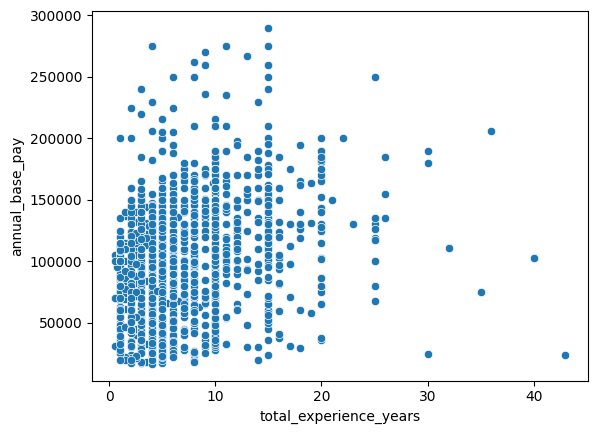

In [6]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [7]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

290000.0


In [8]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [9]:
train, test = testTrainSplit(df)

In [10]:
def sumOfDistances(a, b, c, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        exp = trainDF.iat[row, 0]
        pay = trainDF.iat[row, 1]
        distance = abs((a*exp) + (b*pay) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [14]:
def trainLinearRegression(trainDF):
    count = 0
    slopes = {}
    while count < 1000:
        a = random.randint(15000, 20000) # Slope!
        b = -1 # Coefficient to y --> by = ax + c --> negative because we move to other side
        c = 900 # Y-intercept
        count = count + 1
        sum = sumOfDistances(a, b, c, train)
        slopes[a] = sum
    return slopes

In [15]:
trainSlopes = trainLinearRegression(train)
print(trainSlopes)

{19430: 3606.8195608432534, 16625: 3614.2522954165856, 19460: 3607.6492634792385, 16169: 3637.3774066126566, 16385: 3625.4336044777087, 17277: 3594.066328412743, 19645: 3612.709766762544, 17177: 3596.438316080367, 17400: 3591.6466906202127, 19443: 3607.179413014306, 17072: 3599.2209380615586, 17387: 3591.8716372409326, 19326: 3604.022559596248, 15237: 3706.900358230532, 15658: 3671.620038495066, 15507: 3683.579031484397, 17021: 3600.612645216516, 16924: 3603.4576278385725, 17470: 3590.6808138084116, 16115: 3640.5714680139045, 18844: 3593.4842042375158, 16593: 3615.6060851594216, 15932: 3652.104132901374, 15870: 3656.313598286341, 19265: 3602.5388926291434, 17888: 3586.6814724813366, 15838: 3658.52431901134, 19264: 3602.51623476413, 19578: 3610.8880900900026, 15339: 3697.7542081925617, 18671: 3590.505697812012, 19379: 3605.4101887082056, 15103: 3719.4705076384325, 17555: 3589.573655241363, 15742: 3665.4124154223473, 19851: 3618.342929266156, 17475: 3590.615388684644, 16190: 3636.1805563

In [16]:
temp = min(trainSlopes.values())
res = [key for key in trainSlopes if trainSlopes[key] == temp]
 
print("slope: " + str(res[0]))
print("distace: " + str(temp))

slope: 18137
distace: 3586.47605233105


In [31]:
a = 18137
b = -1
c = 900
prediction = []
#ax +by = c
for row in range(0, len(test.index)):
    exp = test.iat[row, 0]
    prediction.append((c - (a * exp))/ b)
print(prediction)

[126059.0, 17237.0, 71648.0, 53511.0, 144196.0, 17237.0, 26305.5, 198607.0, 180470.0, 126059.0, 35374.0, 35374.0, 144196.0, 71648.0, 271155.0, 35374.0, 53511.0, 271155.0, 162333.0, 53511.0, 35374.0, 53511.0, 271155.0, 180470.0, 44442.5, 144196.0, 89785.0, 271155.0, 180470.0, 26305.5, 35374.0, 35374.0, 53511.0, 53511.0, 325566.0, 361840.0, 35374.0, 107922.0, 89785.0, 71648.0, 253018.0, 8168.5, 452525.0, 53511.0, 44442.5, 71648.0, 89785.0, 71648.0, 216744.0, 180470.0, 71648.0, 35374.0, 180470.0, 17237.0, 53511.0, 17237.0, 53511.0, 17237.0, 144196.0, 26305.5, 198607.0, 180470.0, 180470.0, 271155.0, 180470.0, 53511.0, 162333.0, 89785.0, 107922.0, 180470.0, 89785.0, 89785.0, 107922.0, 216744.0, 35374.0, 35374.0, 35374.0, 107922.0, 53511.0, 35374.0, 26305.5, 180470.0, 180470.0, 53511.0, 361840.0, 53511.0, 35374.0, 44442.5, 144196.0, 71648.0, 144196.0, 107922.0, 89785.0, 35374.0, 35374.0, 53511.0, 71648.0, 89785.0, 53511.0, 71648.0, 53511.0, 71648.0, 343703.0, 89785.0, 107922.0, 26305.5, 3537

In [35]:
actual = [row for row in test.iloc[:, 1]]
print(actual)

[145000.0, 62000.0, 120000.0, 150000.0, 153000.0, 58000.0, 112500.0, 130000.0, 120000.0, 72485.0, 44000.0, 44000.0, 156800.0, 75000.0, 58000.0, 130000.0, 105000.0, 150000.0, 171000.0, 48500.0, 75000.0, 125000.0, 125000.0, 165000.0, 117000.0, 72000.0, 119000.0, 210000.0, 120000.0, 22310.0, 61000.0, 120000.0, 120000.0, 120000.0, 140000.0, 80000.0, 65000.0, 70000.0, 40000.0, 135000.0, 120000.0, 100000.0, 135000.0, 130000.0, 123000.0, 103000.0, 77000.0, 69000.0, 101000.0, 106000.0, 100000.0, 120500.0, 140000.0, 114500.0, 70000.0, 112500.0, 220000.0, 100000.0, 250000.0, 110000.0, 155000.0, 190000.0, 160000.0, 132000.0, 125000.0, 97000.0, 30500.0, 159500.0, 160000.0, 141000.0, 190000.0, 130000.0, 90000.0, 115000.0, 57516.0, 75000.0, 64000.0, 140000.0, 18000.0, 100000.0, 77000.0, 128000.0, 150000.0, 126000.0, 175000.0, 65000.0, 92000.0, 21027.0, 140000.0, 110000.0, 130000.0, 155000.0, 135000.0, 140000.0, 225000.0, 110000.0, 50000.0, 95000.0, 58000.0, 66000.0, 89000.0, 128000.0, 164000.0, 3200

In [37]:
for i in range(len(test)):
    mse = ((actual[i] - prediction[i])**2)/len(train)
print(mse)

220137.18529707956
